          수입     지출      잔액
카테고리                       
교통비      0.0  150.0  -150.0
급여    3000.0    0.0  3000.0
부업     800.0    0.0   800.0
식비       0.0  500.0  -500.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

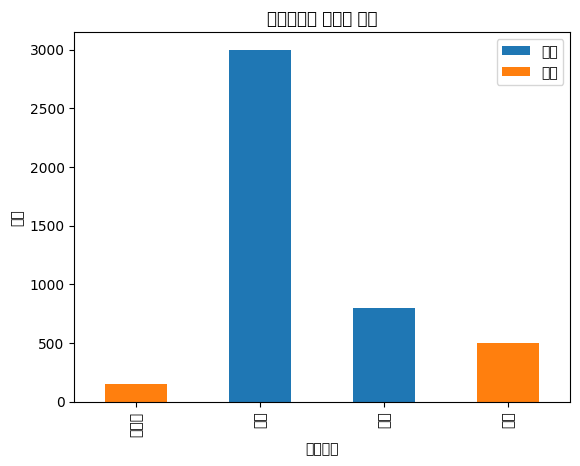

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 가계부 데이터 초기화
data = {
    '날짜': [],
    '카테고리': [],
    '금액': [],
    '유형': []  # '수입' 또는 '지출'
}

# 데이터프레임 생성
df = pd.DataFrame(data)

def add_transaction(date, category, amount, transaction_type):
    global df
    new_transaction = pd.DataFrame({'날짜': [date], '카테고리': [category], '금액': [amount], '유형': [transaction_type]})
    df = pd.concat([df, new_transaction], ignore_index=True)

def show_summary():
    income = df[df['유형'] == '수입'].groupby('카테고리')['금액'].sum()
    expenses = df[df['유형'] == '지출'].groupby('카테고리')['금액'].sum()

    summary = pd.DataFrame({'수입': income, '지출': expenses}).fillna(0)
    summary['잔액'] = summary['수입'] - summary['지출']
    print(summary)

    summary[['수입', '지출']].plot(kind='bar', stacked=True)
    plt.title('카테고리별 수입과 지출')
    plt.xlabel('카테고리')
    plt.ylabel('금액')
    plt.show()

# 거래 추가 예시
add_transaction('2024-12-01', '급여', 3000, '수입')
add_transaction('2024-12-02', '식비', 500, '지출')
add_transaction('2024-12-03', '교통비', 150, '지출')
add_transaction('2024-12-04', '부업', 800, '수입')

# 요약 출력
show_summary()
